#<a> Transformers for Emoji prediction in Federated systems. </a>

> ![](https://i.imgur.com/fOeJmu3.jpg)



> The experimental landscape in natural language processing for social media is too fragmented. Each year, new shared tasks and
datasets are proposed, ranging from classics
like sentiment analysis to irony detection or
emoji prediction. Therefore, it is unclear what
the current state of the art is, as there is
no standardized evaluation protocol, neither a
strong set of baselines trained on such domainspecific data.

> [Source: TWEETEVAL paper](https://arxiv.org/pdf/2010.12421.pdf) & [Source Photo](https://i.imgur.com/fOeJmu3.jpg)






## <a>Install some packages 

In [ ]:
!pip install flwr["simulation"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 7.2 MB/s 
     |████████████████████████████████| 1.0 MB 49.1 MB/s 
     |████████████████████████████████| 54.5 MB 242 kB/s 
     |████████████████████████████████| 4.1 MB 55.7 MB/s 
     |████████████████████████████████| 8.8 MB 46.1 MB/s 
     |████████████████████████████████| 201 kB 51.8 MB/s 
     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 90 kB 7.1 MB/s 
     |████████████████████████████████| 128 kB 45.8 MB/s 
     |████████████████████████████████| 3.0 MB 37.6 MB/s 
     |████████████████████████████████| 291 kB 55.9 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 468 kB 49.9 MB/s 
  Created wheel for gpustat: filename=gpustat-1.0.0-py3-none-any.whl size=19889 sha256=d2a3891c2ff005da5f270c981ba3b1d02b6196bae654f8e1edd3cdc4f5830920
  S

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 28.3 MB/s 
     |████████████████████████████████| 163 kB 64.9 MB/s 
     |████████████████████████████████| 7.6 MB 58.2 MB/s 


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 19.6 MB/s 
     |████████████████████████████████| 212 kB 61.8 MB/s 
     |████████████████████████████████| 115 kB 70.1 MB/s 
     |████████████████████████████████| 127 kB 73.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## <a>Imports 

In [ ]:
import random
import pandas as pd
import gdown

import json
import re
import string 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import OrderedDict
import warnings

import flwr as fl
import torch
import numpy as np

from torch.utils.data import DataLoader
from datasets import load_dataset, load_metric, Dataset

from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from transformers import AdamW

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from scipy.special import softmax

import csv
import urllib.request

import gc

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

> ## Dwonload the data from our Drive



In [ ]:
# url = "https://drive.google.com/drive/folders/1vpMiGL4_bwguZO3hyZGMbz1v8pKTolmq?usp=sharing"
url = "https://drive.google.com/drive/folders/1fbLZaQmwuRXYlx_wUsfsAiG18e_we_zC?usp=sharing"
gdown.download_folder(url)

Retrieving folder list


Processing file 10jJiPSad7R-nOpUDHz0G9JFCt8FRJYml Karim_140K_es.csv
Processing file 1K0Q2d8VgiJPvwkTbXgGD9eGaaYbANMcu Karim_300K_it.csv
Processing file 1ATgspw32caK3EomNPa3DvQ51NiSf4VPQ Karim_450K_fr.csv
Processing file 1Bi2v9_4Q0INv-CkYQk7Ofgehe7dPtktP Karim_620K_en.csv
Processing file 1WVsf_YZLM11Wr8DDYlyUjxPQjpzCUDzk test_sentences.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=10jJiPSad7R-nOpUDHz0G9JFCt8FRJYml
To: /content/Karim_140K_es.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 48.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K0Q2d8VgiJPvwkTbXgGD9eGaaYbANMcu
To: /content/Karim_300K_it.csv
100%|██████████| 54.6M/54.6M [00:00<00:00, 75.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ATgspw32caK3EomNPa3DvQ51NiSf4VPQ
To: /content/Karim_450K_fr.csv
100%|██████████| 84.6M/84.6M [00:01<00:00, 79.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Bi2v9_4Q0INv-CkYQk7Ofgehe7dPtktP
To: /content/Karim_620K_en.csv
100%|██████████| 93.4M/93.4M [00:00<00:00, 98.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WVsf_YZLM11Wr8DDYlyUjxPQjpzCUDzk
To: /content/test_sentences.csv
100%|██████████| 228/228 [00:00<00:00, 188kB/s]
Download completed


['/content/Karim_140K_es.csv',
 '/content/Karim_300K_it.csv',
 '/content/Karim_450K_fr.csv',
 '/content/Karim_620K_en.csv',
 '/content/test_sentences.csv']

In [ ]:
# read it by adding the headers
# df = pd.read_csv("/content/folders_for_fun/140K_dataSet.csv", header = None, names = ['Tweet', 'Label'])
# df = pd.read_csv("/content/Good_one/Karim_620K_en.csv")
# ['/content/Good_one/Karim_140K_es.csv','/content/Good_one/Karim_300K_it.csv','/content/Good_one/Karim_450K_fr.csv','/content/Good_one/Karim_620K_en.csv']
df = pd.concat(map(pd.read_csv, ['/content/Good_one/Karim_140K_es.csv','/content/Good_one/Karim_300K_it.csv','/content/Good_one/Karim_450K_fr.csv','/content/Good_one/Karim_620K_en.csv']))

In [ ]:
df

,Tweet,Label_2,Label,Tweet_cleaned
0,Pues me voy a cocinar ✨,✨,7,pues voy cocinar
1,ojalá que algún día me vuelvas a llamar odio l...,✨,7,ojal alg vuelvas llamar odio escenas sexo pel ...
2,endereza tu espalda ✨,✨,7,endereza espalda
3,Hay que respetar y entender que no todos somos...,✨,7,respetar entender iguales definitivamente si c...
4,El 2023 rompo todo ✨,✨,7,rompo
...,...,...,...,...
623668,… and thanksgiving… and 🎄,🎄,17,thanksgiving
623669,Great play by Ward let’s go the story of killd...,🎄,17,great play ward let go story killdozer makes s...
623670,it’s a trap y’all don’t use your phone out of ...,🎄,17,trap use phone case fuck supposed overwatch di...
623671,"qui attend maria carey et son post insta ""xmas...",🎄,17,qui attend maria carey et son post insta xmas ...


In [ ]:
# check any null values
df.isnull().sum()

Tweet            0
Label_2          0
Label            0
Tweet_cleaned    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Tweet            0
Label_2          0
Label            0
Tweet_cleaned    0
dtype: int64

In [ ]:
#print how many duplicate rows in the dataframe
print(df.duplicated('Tweet_cleaned').sum())

78817


In [ ]:
df = df.drop_duplicates('Tweet_cleaned')

In [ ]:
#print how many duplicate rows in the dataframe
print(df.duplicated('Tweet_cleaned').sum())

0


> 

In [ ]:
# Mapping each emoji
emoji_to_idx = {'❤': 0, '😍': 1, '😂': 2, '💕': 3,  '🔥': 4, '😊': 5, '😎': 6, '✨': 7, '💙': 8, '😘': 9, '📷': 10, '🇺🇸': 11, '☀': 12,\

                '💜': 13, '😉': 14,'💯': 15, '😁': 16, '🎄': 17, '📸': 18, '😜': 19}

In [ ]:
# We won't use this method but just in case you want to try it.
def get_emoji(input_):
  list_ = []
  for i in range(20):
    # print(list(emoji_to_idx.keys())[list(emoji_to_idx.values()).index(city_count.index[i])])
    list_.append(list(emoji_to_idx.keys())[list(emoji_to_idx.values()).index(input_[i])])
  return list_

In [ ]:
# To compare each emoji to each other before over-sampling
def distribution_method(df_):

  # in the column 'Label'
  c_count  = df_['Label'].value_counts()
  c_count = c_count[:,]
  plt.figure(figsize=(12,5))
  sns.barplot(c_count.index, c_count.values, alpha=0.8)
  plt.title('The distribution for each class/Label')
  # plt.ylabel('Number of Occurrences', fontsize=20)
  plt.xlabel('Label', fontsize=20)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


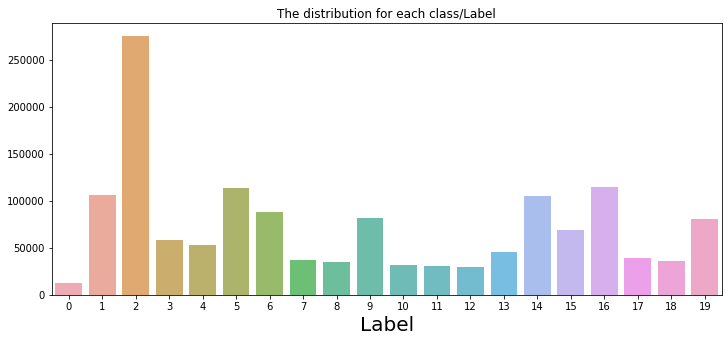

In [ ]:
# you just need to call it
distribution_method(df)

> ## <a> Random Oversampling Imbalanced Datasets

> Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df['Tweet_cleaned'].values
y = df["Label"].values

os = RandomOverSampler()

X = X.reshape(-1,1)

X, y = os.fit_resample(X, y)

X = X.reshape(-1,)
print('X shape : ', X.shape, '\n')

X shape :  (5518040,) 



In [ ]:
df = pd.DataFrame({'Tweet_cleaned': np.array(X), 'Label': np.array(y)}, columns=['Tweet_cleaned', 'Label'])

In [ ]:
df

,Tweet_cleaned,Label
0,pues voy cocinar,7
1,ojal alg vuelvas llamar odio escenas sexo pel ...,7
2,endereza espalda,7
3,respetar entender iguales definitivamente si c...,7
4,rompo,7
...,...,...
5518035,ponds tellement vite mp mails impression tre s...,19
5518036,f japanese gp gp suzuka mi sol lo mejor hay la...,19
5518037,likes twit regalo lbum mundial coballa,19
5518038,ok goodnight headsche,19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


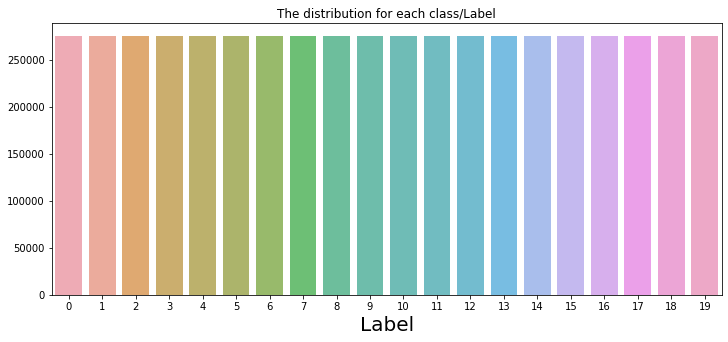

In [ ]:
distribution_method(df)

> ## Server & clients Data split

> As you know in the federated systems we need to train the model on some data at first then train the rest of the data on the clients sys to make a good evaluation.

> This method just for splitting , this is not the same ratio that will be trained by the model.

In [ ]:
# this method just for splitting 
def splitting_method(df_, name1 ,name2, test_size = 0.5):
  y = pd.DataFrame(df_, columns = ["Label"])  
  X = pd.DataFrame(df_, columns = ['Tweet_cleaned'])

  X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=105)

  df_t = pd.DataFrame(X_train, columns = ['Tweet_cleaned'])
  df_yt = pd.DataFrame(y_train, columns = ['Label'])

  train_data = pd.concat([df_t, df_yt], axis=1)
  train_data.to_csv(name1+".csv", index = False,)

  df_xtest = pd.DataFrame(X_test, columns = ['Tweet_cleaned'])
  df_ytest = pd.DataFrame(y_test, columns = ['Label'])

  test_data = pd.concat([df_xtest, df_ytest], axis=1)
  # print(test_data.isnull().sum())
  test_data.to_csv(name2+".csv", index = False,)

  # return train_data
  return test_data


In [ ]:
# you can call it :)
splitting_method(df,'centralized_dataset','fedrated_dataset',test_size = 0.5)

,Tweet_cleaned,Label
4444406,voy arrancar gim devuelta toquen quiere ah van...,14
2510562,@hnlsk yeah well big nerd,6
938953,@dailycosmicnews @planetmari maybe one went in...,2
1775754,bring title home sinner im one,1
1678773,ahhhhhhaces love,0
...,...,...
862625,lmaoooo imma get,2
3373235,@i mulangwa cafwclzq match day cbe warriors qf...,10
4069834,non socome profumo caff mette sempre buonumore...,12
68226,cigarrito feliz,5


In [ ]:
df_c= pd.read_csv("/content/centralized_dataset.csv")

In [ ]:
df_c

,Tweet_cleaned,Label
0,lem look look away,0
1,wey si gusta presumir novia mejores amigos nim...,9
2,@daniel stagner best response hell yes evolution,4
3,ok jajaja todo encuentra su lugar trata fluir ...,7
4,cette histoire el insta agace imaginez tini ca...,7
...,...,...
2759015,disfrutar mejor solos,14
2759016,@home in douai less gilly yeah,2
2759017,avanzando reto tecnologosdelfuturo trilog fron...,16
2759018,need life words never came mouth portal full m...,7


In [ ]:
df_f = pd.read_csv("/content/fedrated_dataset.csv")

In [ ]:
df_f

,Tweet_cleaned,Label
0,voy arrancar gim devuelta toquen quiere ah van...,14
1,@hnlsk yeah well big nerd,6
2,@dailycosmicnews @planetmari maybe one went in...,2
3,bring title home sinner im one,1
4,ahhhhhhaces love,0
...,...,...
2759015,lmaoooo imma get,2
2759016,@i mulangwa cafwclzq match day cbe warriors qf...,10
2759017,non socome profumo caff mette sempre buonumore...,12
2759018,cigarrito feliz,5


> ### Split the server data for server training

In [ ]:
df_server = pd.read_csv("/content/centralized_dataset.csv")

In [ ]:
# you can call it :)
splitting_method(df_server,'TrainServer','TestServer',0.1)

,Tweet_cleaned,Label
252978,todo va estar bien todo va curar todo va sanar,3
1097783,cuidame mi mismo yo cuido mis enemigos esos ca...,15
458513,tenemos recambio para laaaargooo,11
983150,fume lrem rn votent merde allient comme pen po...,19
385117,el dia esta para escabiarselo todo,9
...,...,...
1122128,estoy por mirar una peli solit,5
873810,happy sabbath me gustar mucho las canciones de...,16
557329,thank much jld good boy today,14
2616295,latte,3


> ### Split the federated data for clients training

In [ ]:
df_clients = pd.read_csv("/content/fedrated_dataset.csv")

In [ ]:
# you can call it :)
splitting_method(df_clients,'F1_Train_clients','F1_test_clients',0.1)

,Tweet_cleaned,Label
252978,hacelo bien hagas citados tweet soompi plan ha...,4
1097783,thiruchitrambalam vaathi @dhanushkraja rt @lun...,4
458513,ltimos as participar concurso navide @culturai...,10
983150,boyyyyy quipe portugal,4
385117,participations lundi @annyparisfrance mardi @l...,10
...,...,...
1122128,incredibile l essere umano capace mettere scen...,6
873810,actualizaci nes de rm en instagram,18
557329,lip gloss,13
2616295,@bt stwt proud speak,13


# <a> 1. The start of the central training server

> ### The Tokenizer for `bert-base-multilingual-cased` model. 

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cpu")
# CHECKPOINT = "distilbert-base-uncased"  # transformer model checkpoint
CHECKPOINT = "bert-base-multilingual-cased"

In [ ]:
DEVICE

device(type='cuda', index=0)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(CHECKPOINT)

In [ ]:
# method to load our data 
def load_data(A_train, A_test):

    # raw_datasets = load_dataset("csv", data_files="/content/emojify_data.csv")
    raw_datasets = load_dataset("csv", data_files={"train": A_train, "test": A_test})
    raw_datasets = raw_datasets.shuffle(seed=42)

    # # remove unnecessary data split
    # del raw_datasets["unsupervised"]

    tokenizer = AutoTokenizer.from_pretrained(CHECKPOINT)

    def tokenize_function(examples):
        return tokenizer(examples["Tweet_cleaned"], truncation=True)


    population_train = random.sample(range(len(raw_datasets["train"])), raw_datasets['train'].num_rows)
    population_test = random.sample(range(len(raw_datasets["test"])), raw_datasets['test'].num_rows)

    # Note : Before we train our model on the whole data, for simplicity's sake, you can only train it on 3000 records or less.

    # random 100 samples
    # population_train = random.sample(range(len(raw_datasets["train"])), 1000)
    # population_test = random.sample(range(len(raw_datasets["test"])), 100)

    tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

    tokenized_datasets["train"] = tokenized_datasets["train"].select(population_train)
    tokenized_datasets["test"] = tokenized_datasets["test"].select(population_test)

    tokenized_datasets = tokenized_datasets.remove_columns(["Tweet_cleaned"])
    tokenized_datasets = tokenized_datasets.rename_column("Label", "labels")

    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

    trainloader = DataLoader(
        tokenized_datasets["train"],
        shuffle=True,
        batch_size=16,
        collate_fn=data_collator,
    )


    testloader = DataLoader(
        tokenized_datasets["test"], batch_size=16, collate_fn=data_collator
    )

    return trainloader, testloader

> Train and test loader for server/centralized data.

In [ ]:
trainloader_s , testloader_s = load_data("/content/TrainServer.csv","/content/TestServer.csv")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-215a95e1bffbd8f5/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2484 [00:00<?, ?ba/s]

  0%|          | 0/276 [00:00<?, ?ba/s]

> Train and test loader for clients/federated data.

In [ ]:
trainloader_f , testloader_f = load_data("/content/F1_Train_clients.csv","/content/F1_test_clients.csv")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-0f0be1c0735a9247/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2484 [00:00<?, ?ba/s]

  0%|          | 0/276 [00:00<?, ?ba/s]

In [ ]:
def my_plot(epochs, loss, type_  ,acc):
    # plt.ylabel(type_)
    plt.xlabel('No. of epochs')
    # plt.plot()
    plt.title(type_)
    plt.plot(epochs, acc,'b', label='acc')
    plt.plot(epochs, loss,'r', label='loss')
    plt.legend(['acc', 'loss'])
    plt.show()

In [ ]:
def train(net, trainloader, epochs):
    optimizer = AdamW(net.parameters(), lr=5e-5)
    net.train()
    
    # net.to('cuda')
    # predictions = torch.tensor([[1, 2, 3], [4, 5, 6]])
    
    outputs_ = []
    outputs_bbb = []
    loss_vals = []
    acc_vals = []


    for ep in range(epochs):
        outputs_ = []
        outputs_bbb = []
        epoch_loss= []
        acc_each_epock = []
        
        for batch in trainloader:
            batch = {k: v.to(DEVICE) for k, v in batch.items()}
            outputs = net(**batch)
            loss = outputs.loss
            logits = outputs.logits
            # print('outputs.loss : ' , outputs.loss , 'outputs.acc : ' ,outputs.logits)
            metric = load_metric("accuracy")
            predictions = torch.argmax(logits, dim=-1)

            outputs_.append(predictions)
            outputs_bbb.append(batch["labels"])
            
            # print(type(predictions))
            # print(metric.compute(predictions=predictions, references=batch["labels"]))

            acc_each_epock.append(metric.compute(predictions=predictions, references=batch["labels"])['accuracy'])

            loss.backward()
            epoch_loss.append(loss.item())
            optimizer.step()
            optimizer.zero_grad()

            gc.collect()

            torch.cuda.empty_cache()

        print('Epoch No :' ,str(ep+1), 'Loss : ' , sum(epoch_loss)/len(epoch_loss) , 'ACC : ' , sum(acc_each_epock)/len(acc_each_epock))
        acc_dectionary = metric.compute(predictions=predictions, references=batch["labels"])
        acc_vals.append(acc_dectionary['accuracy'])
        loss_vals.append(sum(epoch_loss)/len(epoch_loss))

    # net.to('cpu')
    result = torch.cat(outputs_, dim=0).cpu().numpy()
    res = torch.cat(outputs_bbb, dim=-1).cpu().numpy()
    cf_matrix = classification_report(res, result)
    print(cf_matrix)
    # plotting
    my_plot(np.linspace(1, epochs, epochs).astype(int), loss_vals, 'Loss/Acc', acc_vals)
    # my_plot(np.linspace(1, epochs, epochs).astype(int), acc_vals, 'Accuracy')
    # net.to('cuda')



In [ ]:
def test(net, testloader):
    metric = load_metric("accuracy")
    loss = 0
    net.eval()
    
    outputs_ = []
    outputs_bbb = []
    epoch_loss= []

    for batch in testloader:
        batch = {k: v.to(DEVICE) for k, v in batch.items()}
        with torch.no_grad():
            outputs = net(**batch)
        logits = outputs.logits
        # loss += outputs.loss.item()
        epoch_loss.append(outputs.loss.item())
        predictions = torch.argmax(logits, dim=-1)
        
        outputs_.append(predictions)
        outputs_bbb.append(batch["labels"])
            
        metric.add_batch(predictions=predictions, references=batch["labels"])
    # loss /= len(testloader.dataset)
    loss = sum(epoch_loss)/len(epoch_loss)
    accuracy = metric.compute()["accuracy"]

    result = torch.cat(outputs_, dim=0).cpu().numpy()
    res = torch.cat(outputs_bbb, dim=-1).cpu().numpy()
    cf_matrix = classification_report(res, result)
    print(cf_matrix)

    # return loss, accuracy
    print('Loss : ' , loss , 'ACC : ' , accuracy)

> #### Train & Test the Model

In [ ]:
# Create model
net_bert = AutoModelForSequenceClassification.from_pretrained( CHECKPOINT, num_labels=20 ).to(DEVICE)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
# train(net_bert, trainloader_s, 10)
train(net_bert, trainloader_s, 5)
# train(net_bert, trainloader_s, 1)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate


In [ ]:
test(net_bert, testloader_s)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.05      0.80      0.09         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.00    

In [ ]:
test(net_bert, testloader_f)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.03      1.00      0.05         2
           2       0.10      0.20      0.13         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6
          12       0.21      0.60      0.32         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.00    

> ### Save the model

In [ ]:
torch.save(net_bert,'/content/bert_multilingual_all_langs.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
torch.save(net_bert,'/content/drive/MyDrive/Federated sys PJ/bert_base_multilingual/bert_multilingual_all_langs.pt')


In [ ]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()

In [ ]:
5

5

> ## Test our model with input sentace and compare it with the original model from Huggingface 

In [ ]:
def test_with_sentance(text,net):

  # text = "good morning"
  # text = preprocess(text)

  encoded_input = tokenizer(text, return_tensors='pt')
  net.to('cpu')
  # print(type())
  # encoded_input = {k: v.to(DEVICE) for k, v in encoded_input.items()}
  output = net(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  # download label mapping
  labels=[]
  mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emoji/mapping.txt"
  with urllib.request.urlopen(mapping_link) as f:
      html = f.read().decode('utf-8').split("\n")
      csvreader = csv.reader(html, delimiter='\t')
  labels = [row[1] for row in csvreader if len(row) > 1]

  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  for i in range(scores.shape[0]):
      l = labels[ranking[i]]
      s = scores[ranking[i]]
      print(f"{ranking[i]}) {l} {np.round(float(s), 4)}")

      if i == 2 :
        break

  # net.to('cuda')


In [ ]:
test_with_sentance("Good morning",net_bert)

12) ☀ 0.1052
1) 😍 0.093
0) ❤ 0.0871


In [ ]:
test_with_sentance("I love her",net_bert)

12) ☀ 0.0963
1) 😍 0.0907
0) ❤ 0.0817


In [ ]:
test_with_sentance("Nice car",net_bert)

1) 😍 0.0693
2) 😂 0.0582
7) ✨ 0.0578


In [ ]:
test_with_sentance("Very nice car",net_bert)

1) 😍 0.0861
12) ☀ 0.0764
0) ❤ 0.0658


In [ ]:
test_with_sentance("I am happy",net_bert)

12) ☀ 0.1016
1) 😍 0.0909
0) ❤ 0.0836


In [ ]:
test_with_sentance("I am very happy",net_bert)

12) ☀ 0.0987
1) 😍 0.0905
0) ❤ 0.0835


# <a> 2. The Federated system with Flower Framework ( IID ).

> ## <a> 2.1 The first stage with `Bert model` for the Federated systems with our model

> Note: for this stage we will test our model with the federated test dataset.

In [ ]:
model_loaded = torch.load('/content/bert_multilingual_all_langs.pt')

In [ ]:
DEVICE = torch.device("cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
model_loaded.to(DEVICE)

> ### <a>Flower client 

In [ ]:
# Flower client
class IMDBClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, testloader, cid) -> None:
        self.net = net
        self.trainloader = trainloader
        self.testloader = testloader
        self.cid = cid

    def get_parameters(self, config):
        return [val.cpu().numpy() for _, val in self.net.state_dict().items()]

    def set_parameters(self, parameters):
        params_dict = zip(self.net.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
        self.net.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        
        print("Training Started...")
        train(self.net, self.trainloader, epochs=1)
        print("Training Finished.")

        loss, accuracy = test(self.net, self.testloader)
        print('Client No. : ' , self.cid  , ' Acc per client : ', accuracy)

        return self.get_parameters(config={}), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = test(self.net, self.testloader)
        print('loss : ', loss , '  accuracy : ' ,accuracy)
        return float(loss), len(self.testloader), {"accuracy": float(accuracy)}


In [ ]:
def client_fn(cid: str) -> fl.client.Client:


    # trainloader, testloader = load_data()
    # trainloader_f , testloader_f = load_data("/content/F1_Train_clients.csv","/content/F1_test_clients.csv")

    # start the partitioning

    partition_size = len(trainloader_f) // NUM_CLIENTS
    idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size

    partition_size_testloader = len(testloader_f) // NUM_CLIENTS
    idx_from_testloader, idx_to_testloader = int(cid) * partition_size_testloader, (int(cid) + 1) * partition_size_testloader

    list_partition = []
    for i in trainloader_f:
      list_partition.append(i)

    list_partitiontes_testloader = []

    # the centralized and federated test
    for i in testloader_f:
      list_partitiontes_testloader.append(i)

    # this is for the second stage.

    # for i in testloader_s:
    #   list_partitiontes_testloader.append(i)
        
    
    list_partition = list_partition[idx_from:idx_to]
    # list_partitiontes_testloader = list_partitiontes_testloader[idx_from:idx_to]

    # Create and return client
    return IMDBClient(model_loaded, list_partition, list_partitiontes_testloader, cid)

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]
    # res = list(map(truediv, accuracies, examples))

    print("###  metrics : ", metrics)
    for num_examples, m in metrics:
      print("### num_examples : " , num_examples ,' m : ' , m , ' type of m ' , type(m),'\n')
      print('### m["accuracy"] : ' , m["accuracy"]  ) 
    
    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples), "accuracy client": metrics}

In [ ]:
NUM_CLIENTS = 2

# Create FedAvg strategy
strategy=fl.server.strategy.FedAvg(

        evaluate_metrics_aggregation_fn=weighted_average,  # <-- pass the metric aggregation function

        # fraction_fit=0.1,  # Sample 10% of available clients for training
        # fraction_evaluate=0.05,  # Sample 5% of available clients for evaluation
        # min_fit_clients=10,  # Never sample less than 10 clients for training
        # min_evaluate_clients=NUM_CLIENTS,  # Never sample less than 5 clients for evaluation
        # min_available_clients=int(NUM_CLIENTS * 0.75),  # Wait until at least 75 clients are available
)

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=1),
    strategy=strategy,
)

> ## <a> 2.2 The second stage with `Bert model` for the Federated systems with our model

> Note : for this stage we will test our model with the centralized test dataset

In [ ]:
model_loaded = torch.load('/content/bert_multilingual_all_langs.pt')

In [ ]:
DEVICE = torch.device("cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
model_loaded.to(DEVICE)

> ### <a>Flower client 

In [ ]:
# Flower client
class IMDBClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, testloader, cid) -> None:
        self.net = net
        self.trainloader = trainloader
        self.testloader = testloader
        self.cid = cid

    def get_parameters(self, config):
        return [val.cpu().numpy() for _, val in self.net.state_dict().items()]

    def set_parameters(self, parameters):
        params_dict = zip(self.net.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
        self.net.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        
        print("Training Started...")
        train(self.net, self.trainloader, epochs=1)
        print("Training Finished.")

        loss, accuracy = test(self.net, self.testloader)
        print('Client No. : ' , self.cid  , ' Acc per client : ', accuracy)
        
        return self.get_parameters(config={}), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = test(self.net, self.testloader)
        print('loss : ', loss , '  accuracy : ' ,accuracy)
        return float(loss), len(self.testloader), {"accuracy": float(accuracy)}


In [ ]:
def client_fn(cid: str) -> fl.client.Client:

    # trainloader, testloader = load_data()
    # trainloader_f , testloader_f = load_data("/content/F1_Train_clients.csv","/content/F1_test_clients.csv")

    partition_size = len(trainloader_f) // NUM_CLIENTS
    idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size

    partition_size_testloader = len(testloader_f) // NUM_CLIENTS
    idx_from_testloader, idx_to_testloader = int(cid) * partition_size_testloader, (int(cid) + 1) * partition_size_testloader

    list_partition = []
    for i in trainloader_f:
      list_partition.append(i)

    list_partitiontes_testloader = []

    # the centralized and federated test

    # for i in testloader_f:
    #   list_partitiontes_testloader.append(i)

    for i in testloader_s:
      list_partitiontes_testloader.append(i)
        
    
    list_partition = list_partition[idx_from:idx_to]
    # list_partitiontes_testloader = list_partitiontes_testloader[idx_from:idx_to]

    # Create and return client
    return IMDBClient(model_loaded, list_partition, list_partitiontes_testloader, cid)

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]
    # res = list(map(truediv, accuracies, examples))

    print("###  metrics : ", metrics)
    for num_examples, m in metrics:
      print("### num_examples : " , num_examples ,' m : ' , m , ' type of m ' , type(m),'\n')
      print('### m["accuracy"] : ' , m["accuracy"]  ) 
    
    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples), "accuracy client": metrics}

In [ ]:
NUM_CLIENTS = 2

# Create FedAvg strategy
strategy=fl.server.strategy.FedAvg(
        evaluate_metrics_aggregation_fn=weighted_average,  # <-- pass the metric aggregation function
        
        # fraction_fit=0.1,  # Sample 10% of available clients for training
        # fraction_evaluate=0.05,  # Sample 5% of available clients for evaluation
        # min_fit_clients=10,  # Never sample less than 10 clients for training
        # min_evaluate_clients=NUM_CLIENTS,  # Never sample less than 5 clients for evaluation
        # min_available_clients=int(NUM_CLIENTS * 0.75),  # Wait until at least 75 clients are available
)

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=1),
    strategy=strategy,
)

# <a> 3. The start of the central training server

> #### Train & Test the Model

In [ ]:
# load the model
model_loaded = torch.load('/content/bert_multilingual_all_langs.pt')

In [ ]:
DEVICE = torch.device("cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
model_loaded.to(DEVICE)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch No : 1 Loss :  2.9795629580815635 ACC :  0.08035714285714286
              precision    recall  f1-score   support

           0       0.11      0.14      0.12        50
           1       0.07      0.24      0.11        45
           2       0.06      0.15      0.09        52
           3       0.06      0.07      0.06        56
           4       0.00      0.00      0.00        52
           5       0.03      0.06      0.04        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        41
           9       0.08      0.24      0.12        71
          10       0.20      0.11      0.14        57
          11       0.00      0.00      0.00        50
          12       0.21      0.29      0.24        45
          13       0.00      0.00      0.00        55
          14       0.00      0.00      0.00        42
          15       0.07      0.07      0.07        57
          16  

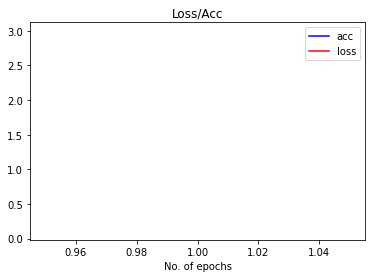

In [ ]:
# train(net_bert, trainloader_f, 10)
# train(net_bert, trainloader_f, 5)
train(model_loaded, trainloader_f, 1)

In [ ]:
test(net_bert, testloader_s)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.05      0.80      0.09         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.00    

In [ ]:
test(net_bert, testloader_f)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.03      1.00      0.05         2
           2       0.10      0.20      0.13         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6
          12       0.21      0.60      0.32         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.00    

> to save our model

In [ ]:
torch.save(net_bert,'/content/bert_multilingual_all_langs.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(net_bert,'/content/drive/MyDrive/Federated sys PJ/bert_base_multilingual/bert_multilingual_all_langs.pt')


In [ ]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()